# Dataset Testing
I want to experiment with a time-series approach to modeling the VENUS data. Here is where I will try out various forms of dataset augmentation to see how it affects the data.'

EDIT: I ended up making a small webapp with streamlit at https://ezra-visualizer.streamlit.app, and it basically does what this notebook does, but you just drop a parquet file in and can plot features over time and compare them with each other.

### Get VENUS Dataset

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
select_run = 10
df = pd.read_parquet('accumulated_weekend_data_2023_02_27.parquet')
run_data = df[df['run_id'] == select_run]

In [118]:
time_params = ["unix_epoch_milliseconds_mean", "time_mean", "start_time", "stop_time"]
tiny_parameters = ["fcv1_i", "inj_mbar", "bias_v", "bias_i", "extraction_i"]
small_parameters = tiny_parameters + ["ext_mbar", "k18_fw", "k18_ref", "g28_fw", "puller_i"]
mean_map = lambda params: [p + "_mean" for p in params]
std_map = lambda params: [p + "_std" for p in params]

In [119]:
tiny_data = run_data[mean_map(tiny_parameters)]
small_data = run_data[mean_map(small_parameters)]

#### Helper Functions to Visualize Data

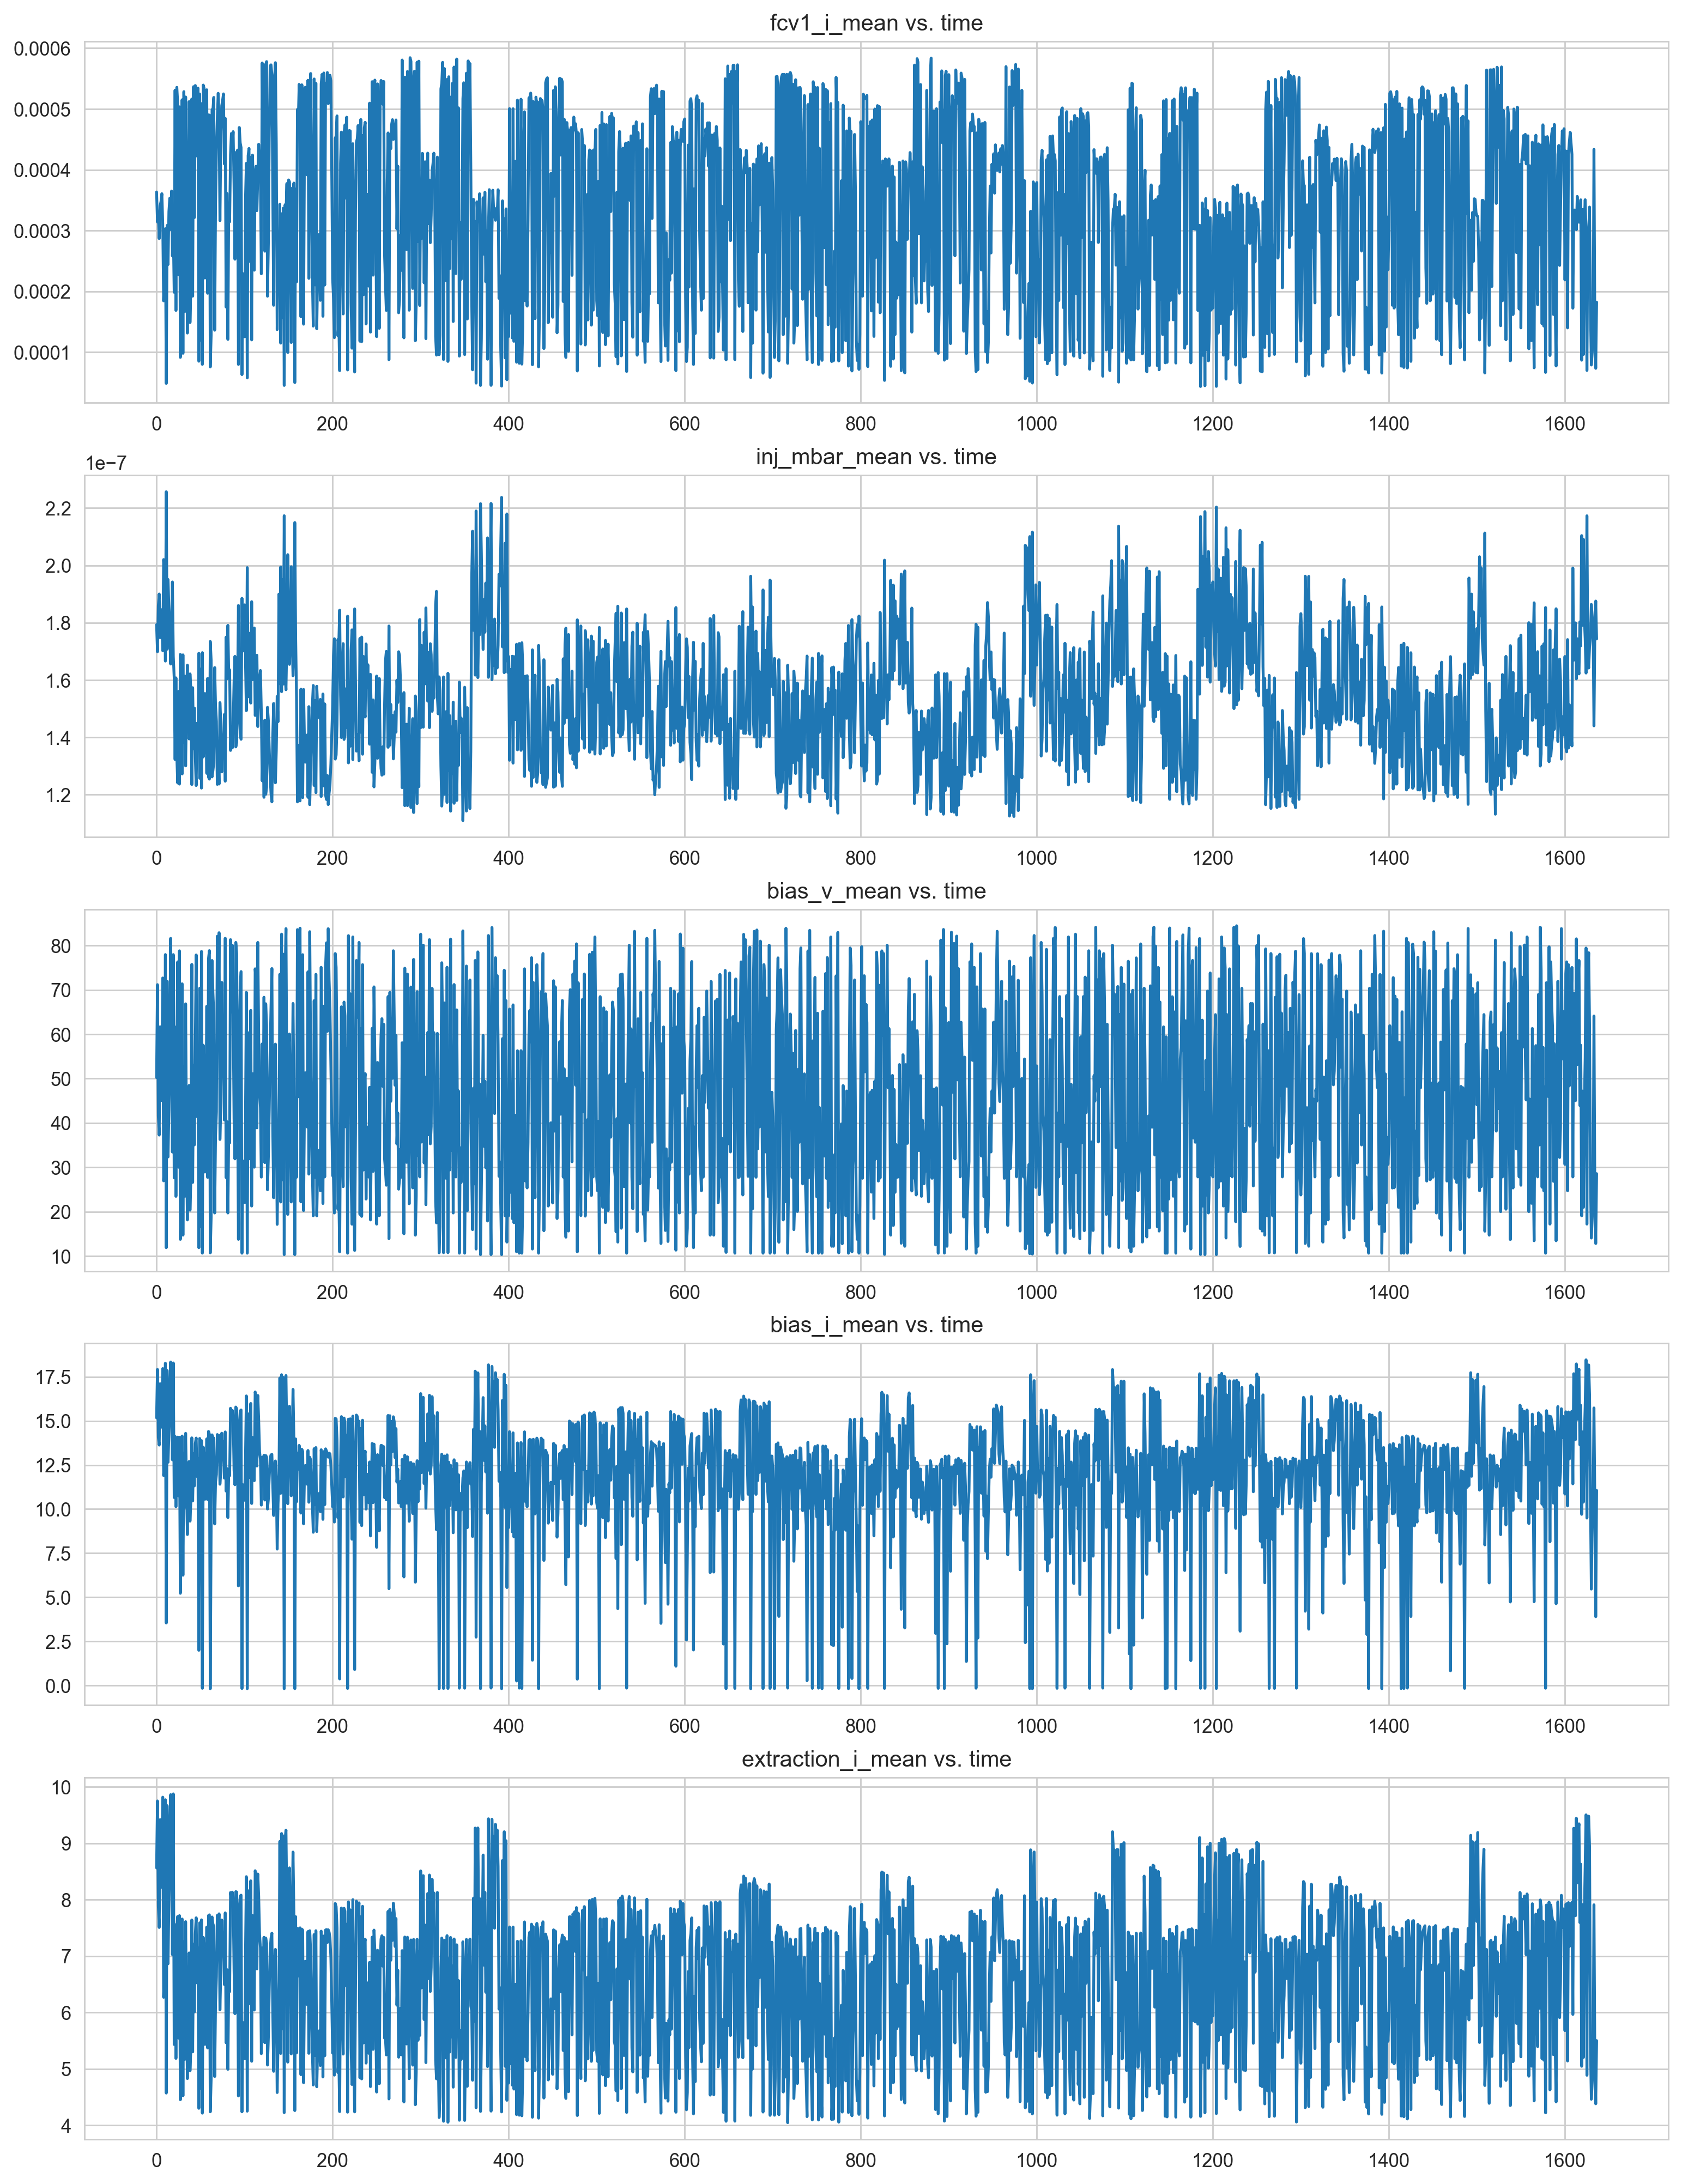

In [120]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 250

def features_over_time(data):
    num_plots = len(data.columns)
    x_axis = range(len(data))
    fig, axes = plt.subplots(num_plots, 1, figsize=(15, 20))
    for i, ax in enumerate(axes.flatten()):
        ax.plot(x_axis, data[data.columns[i]])
        ax.title.set_text(f"{data.columns[i]} vs. time")

def feature_over_time(data, feature):
    x_axis = range(len(data))
    plt.plot(x_axis, data[feature])
    plt.title(f"{feature} vs. time")
    plt.show()

# feature_over_time(tiny_data[:200], "fcv1_i_mean")
features_over_time(tiny_data)

## Standardize Features

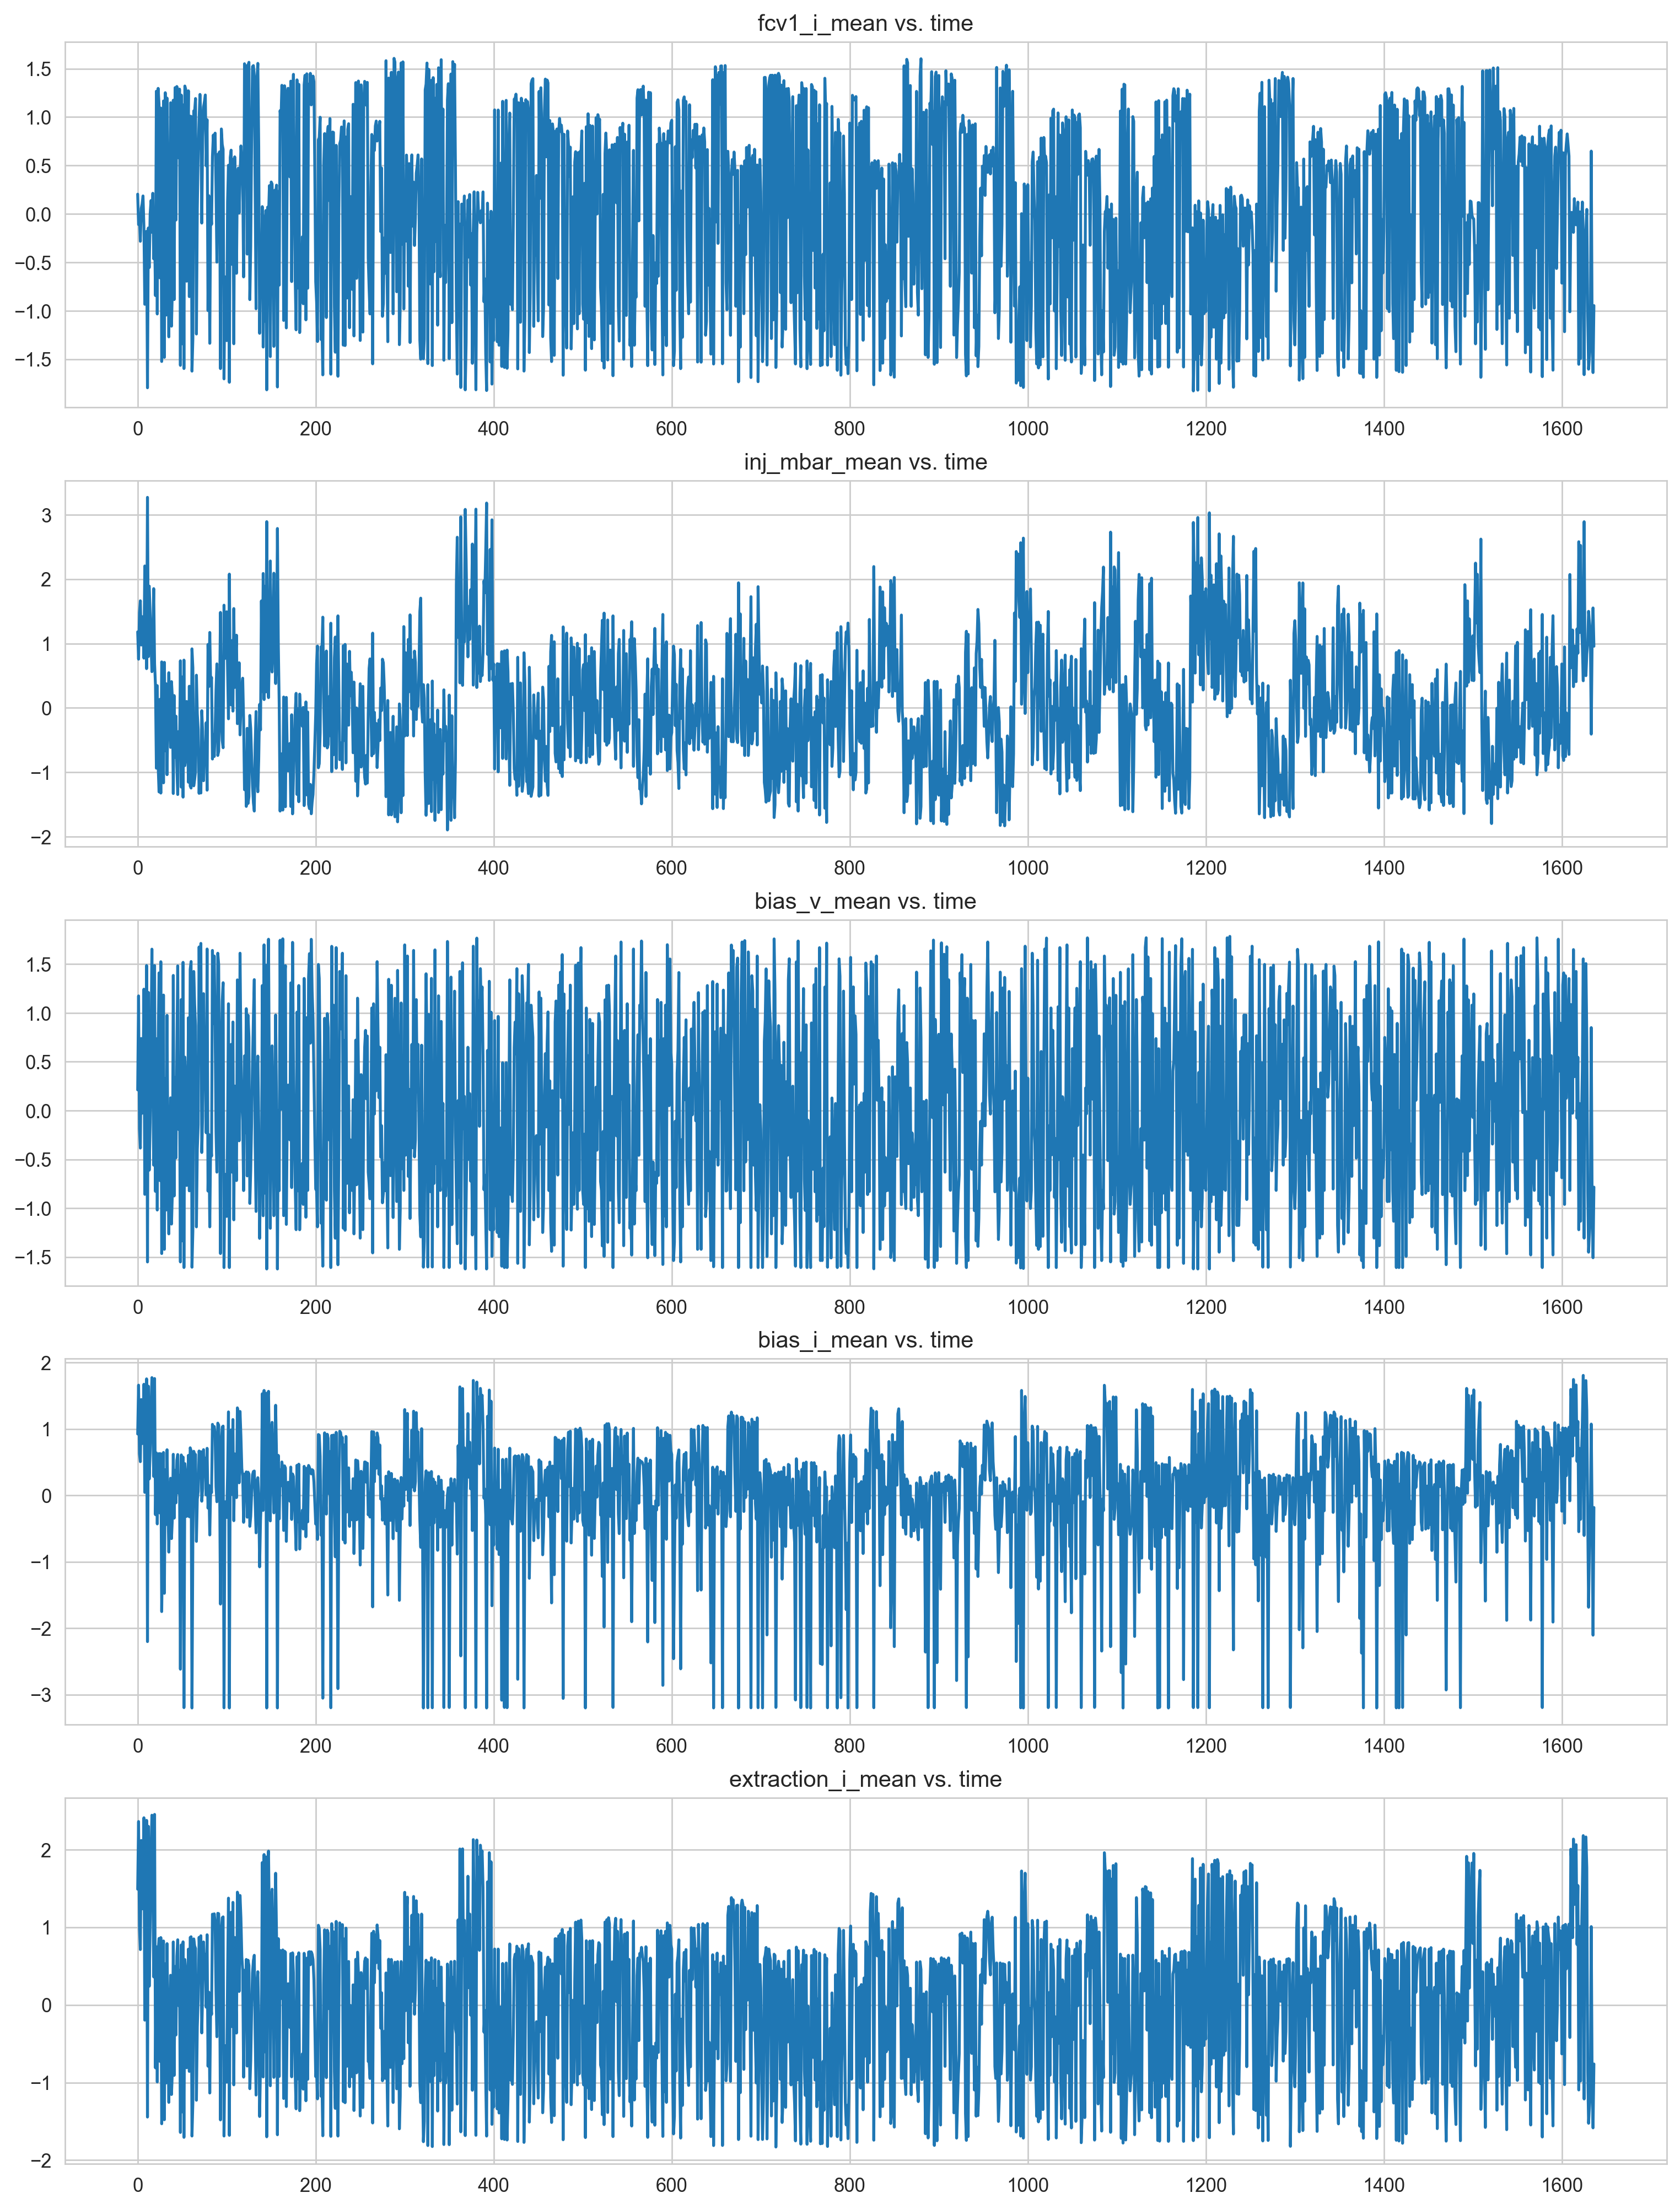

In [121]:
tiny_data = (tiny_data - tiny_data.mean())/tiny_data.std()
features_over_time(tiny_data)

## Smoothing Data

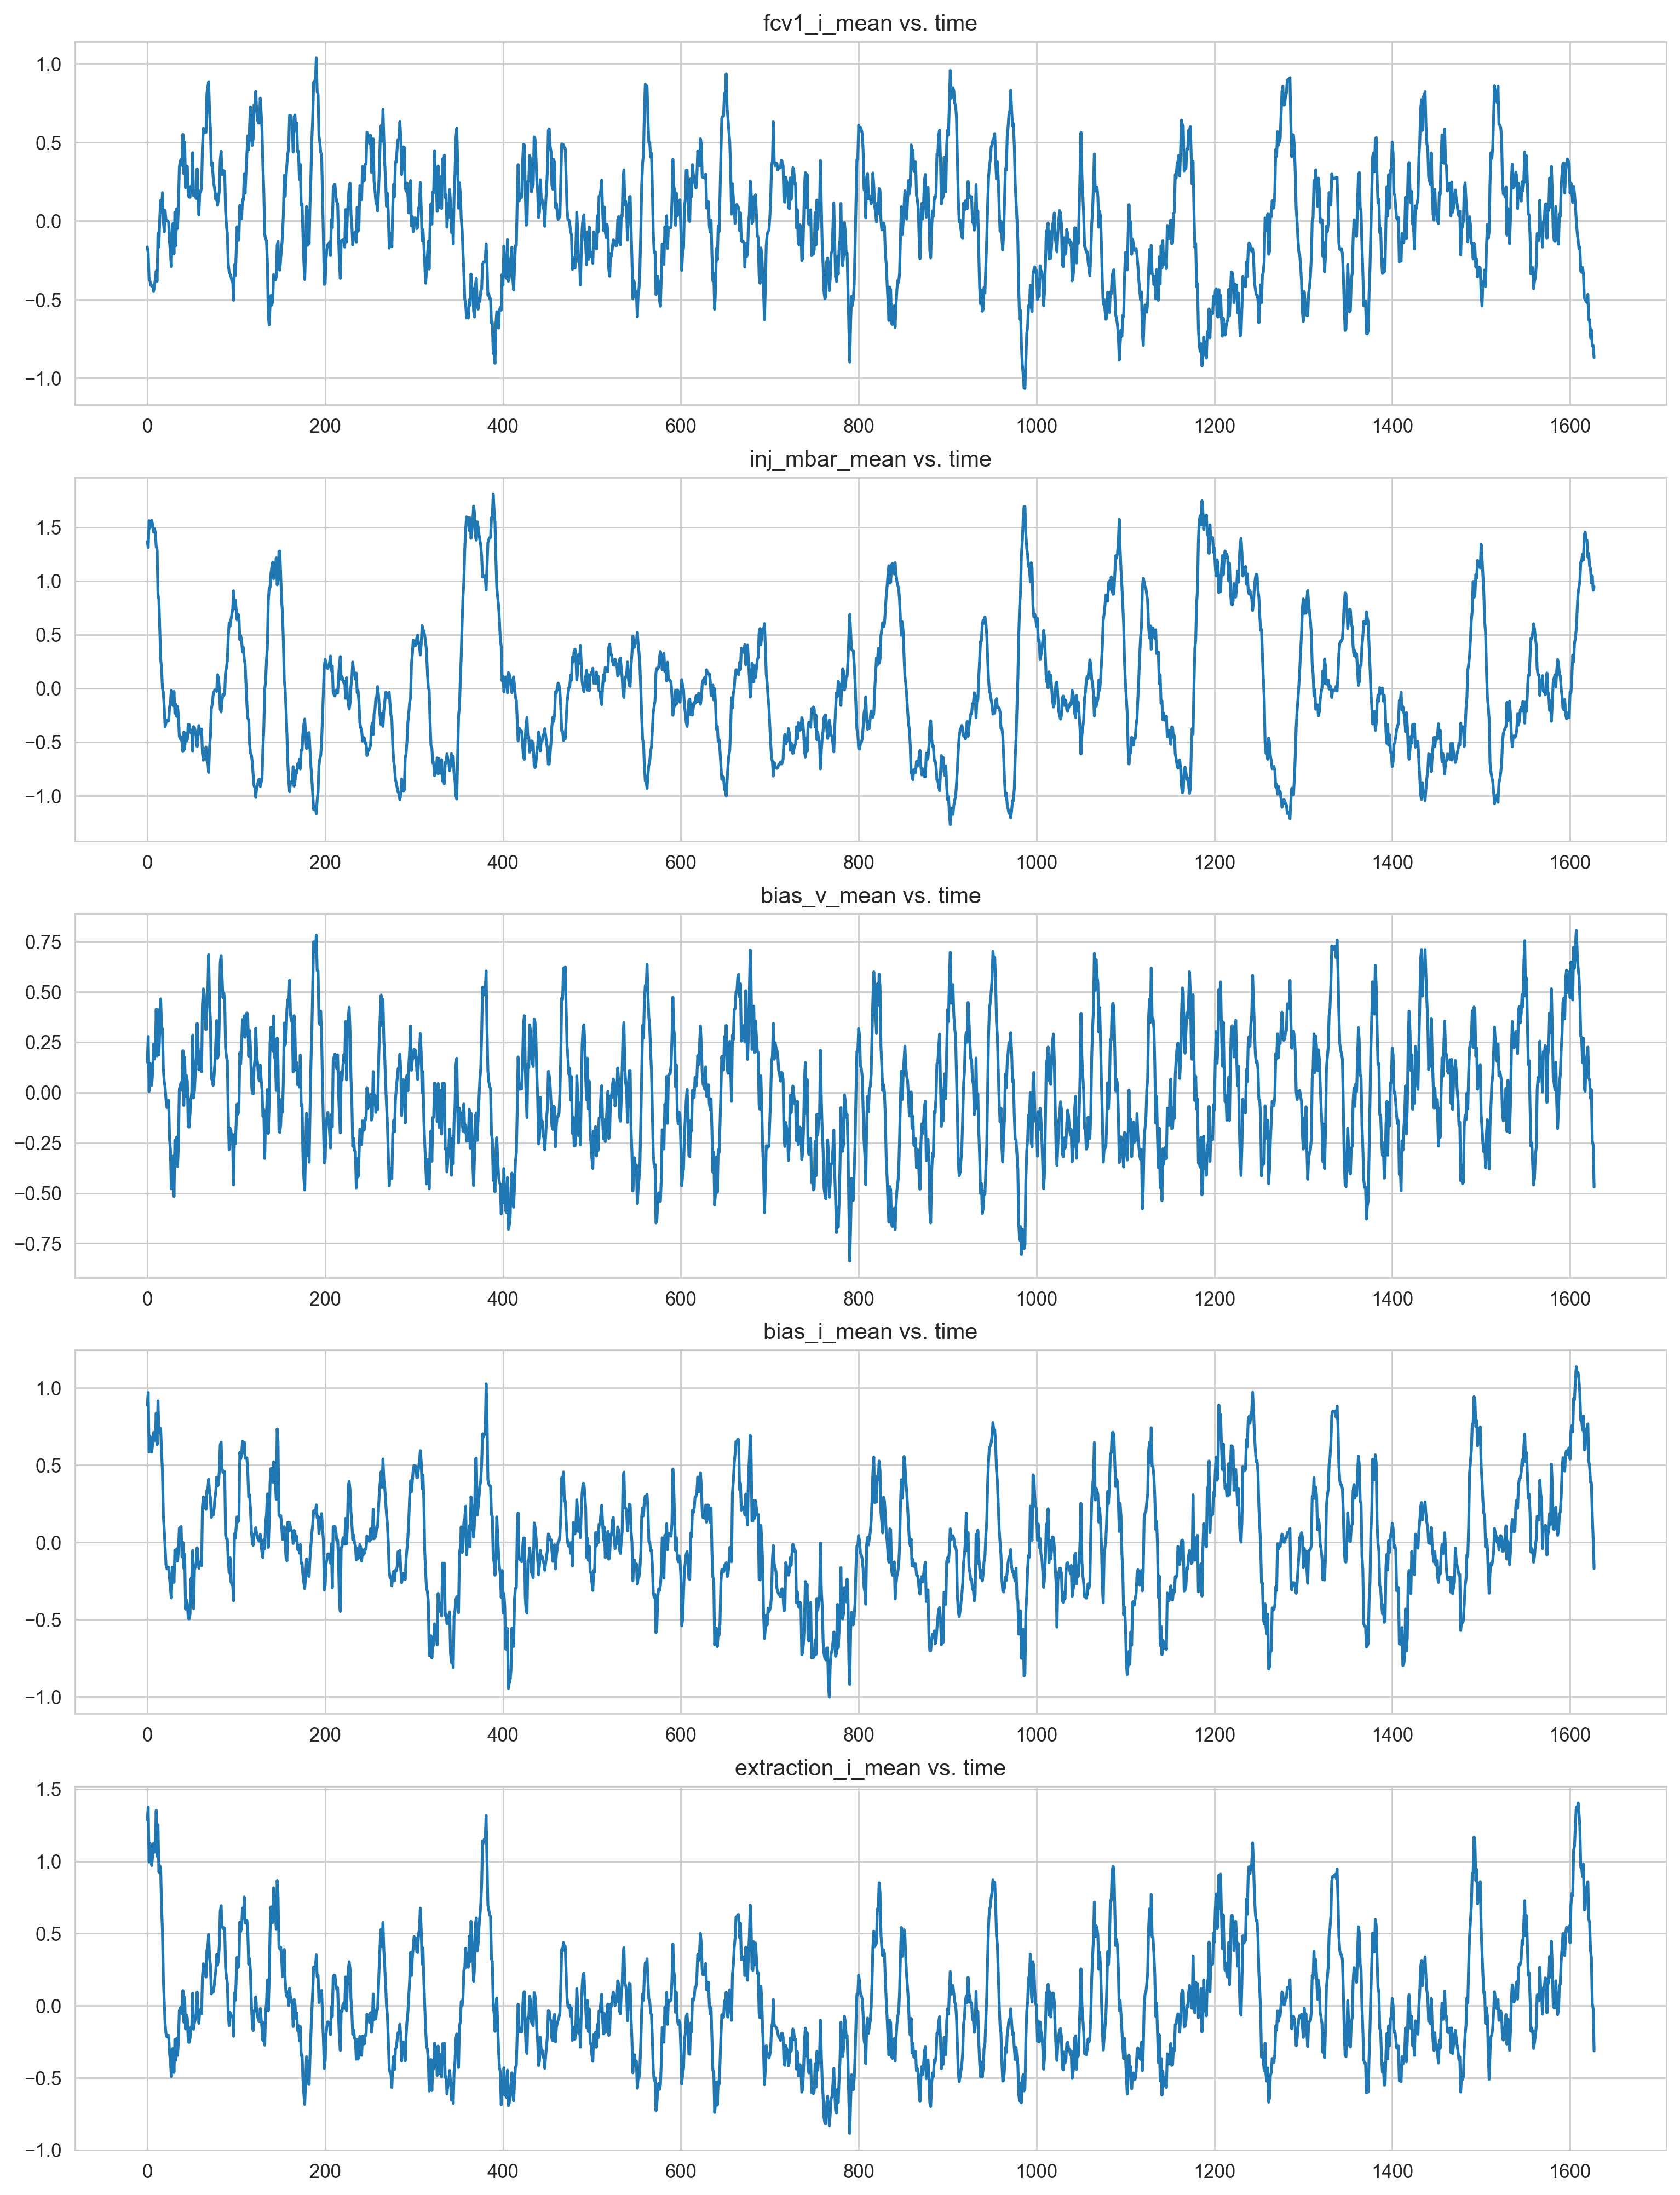

In [122]:
# Rolling Window
smoothed_tiny_rw = tiny_data.rolling(window=10).mean().dropna()
features_over_time(smoothed_tiny_rw)

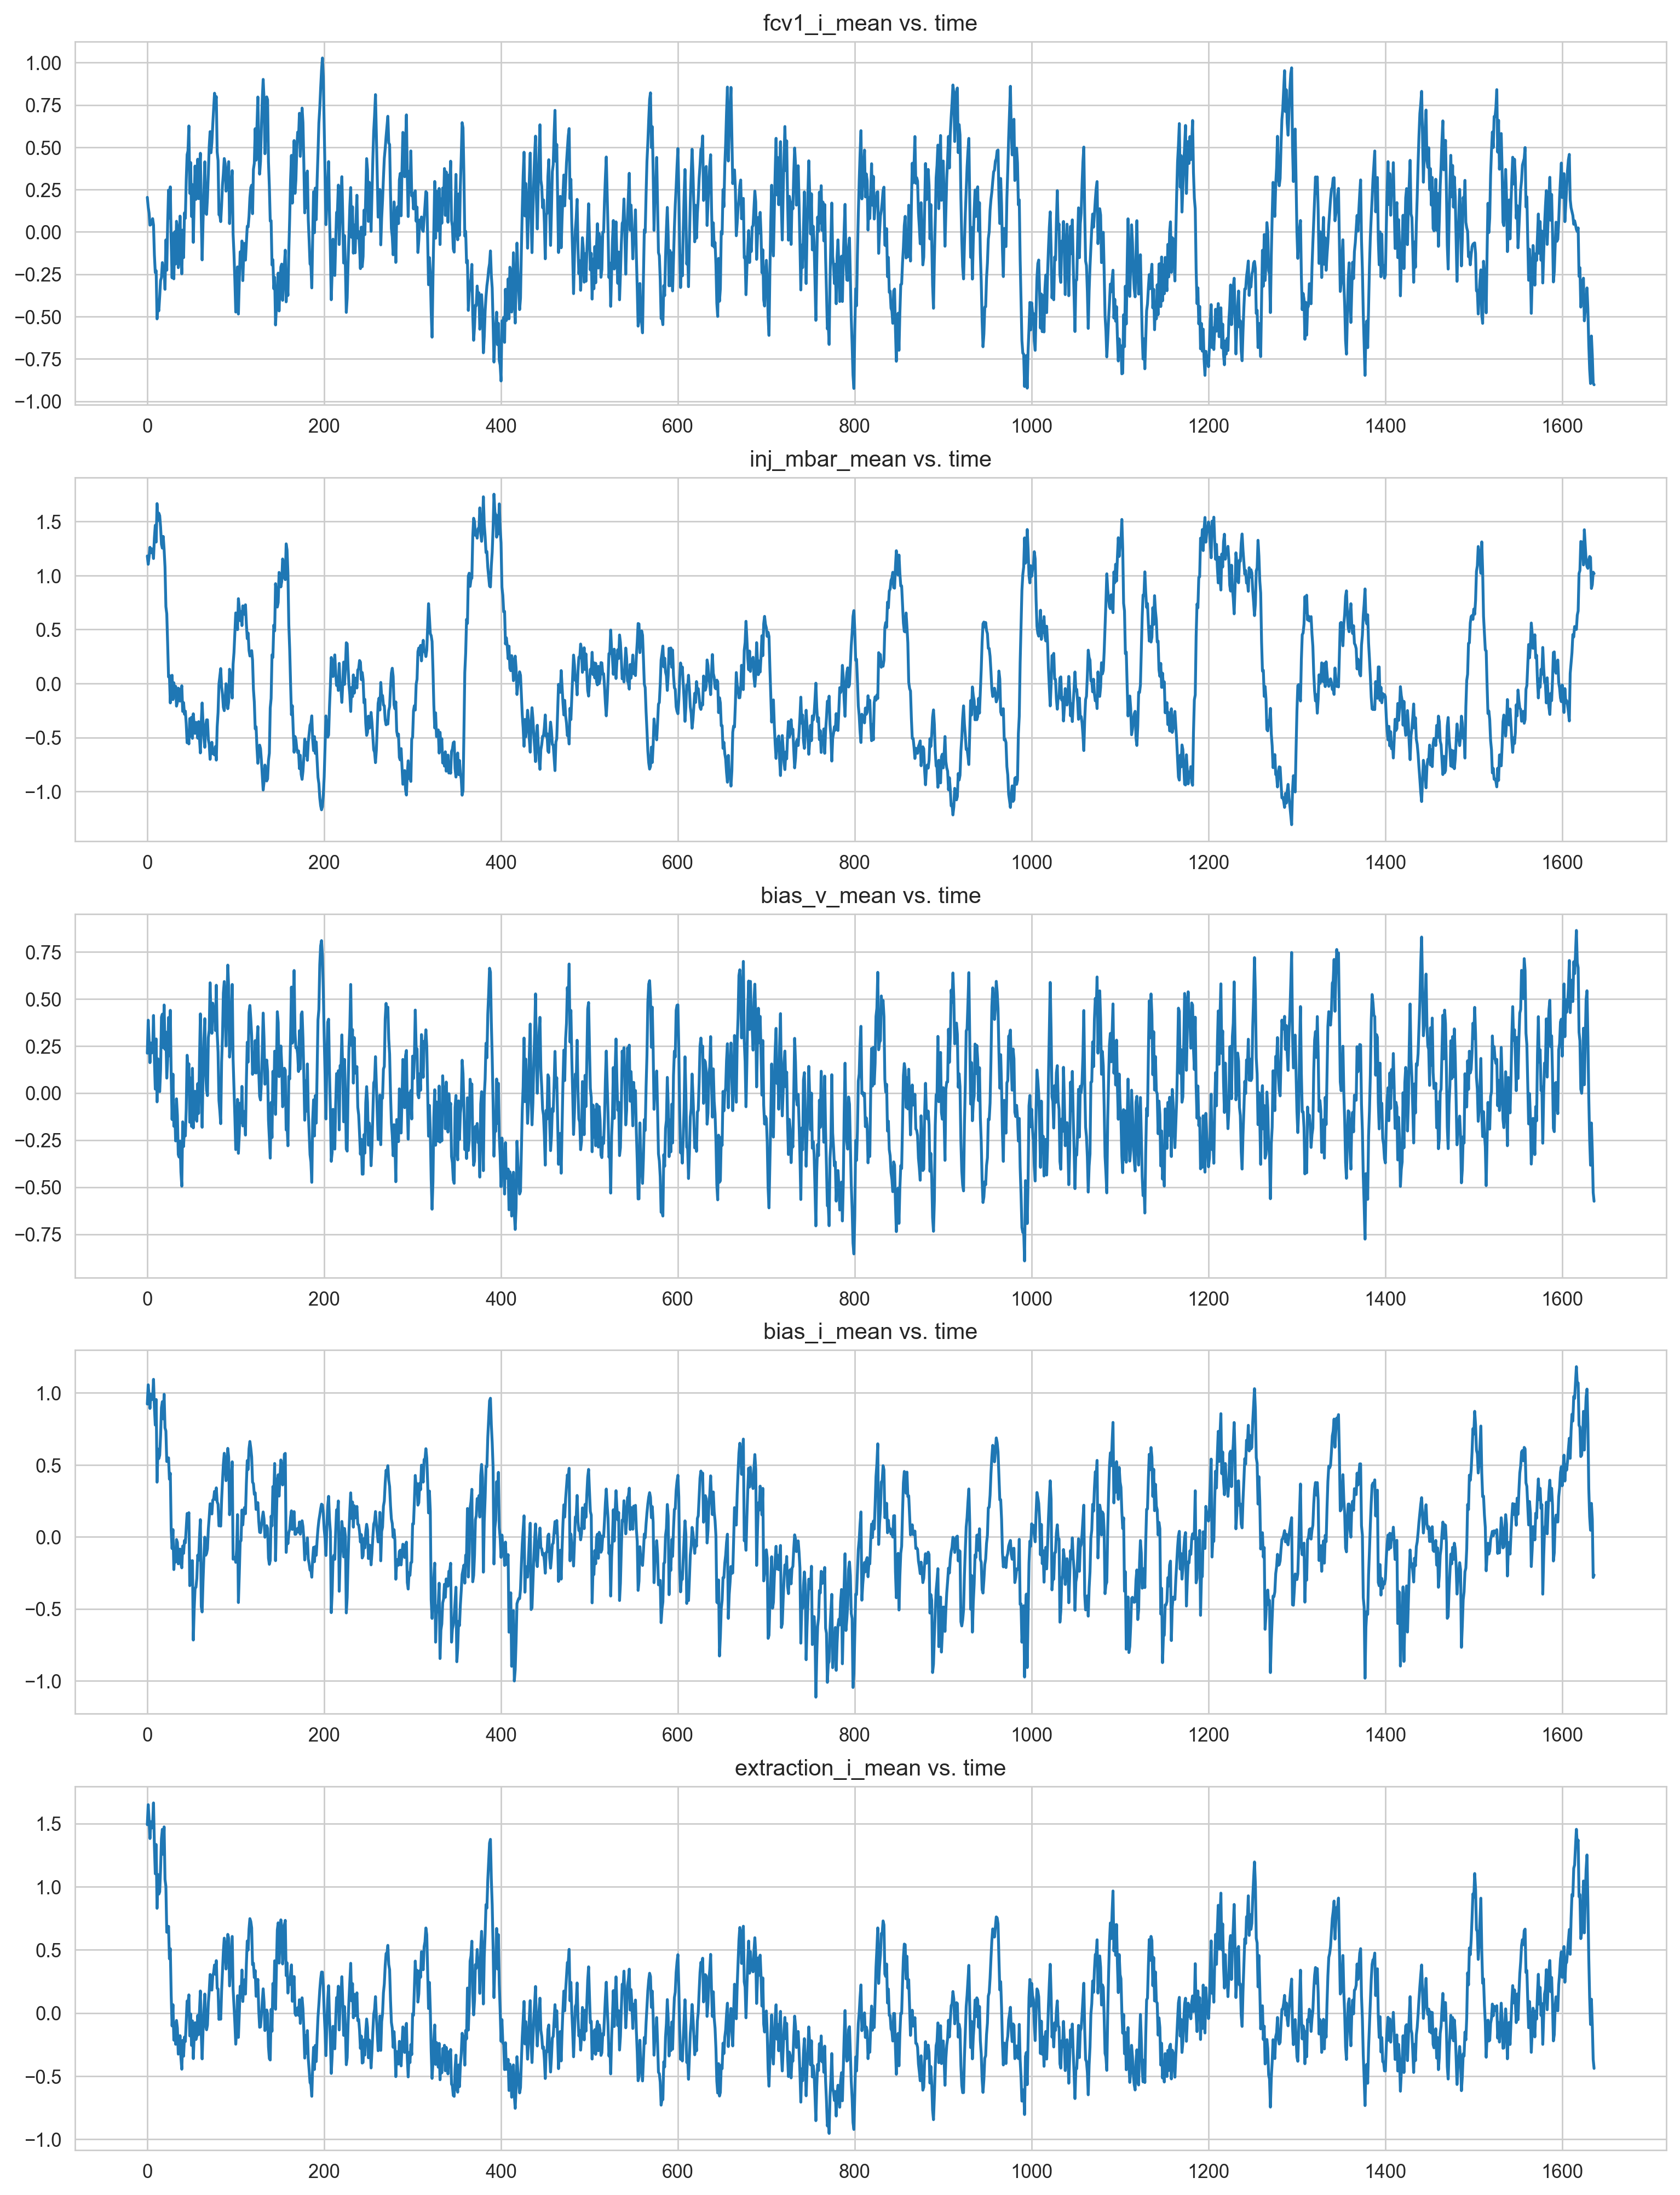

In [123]:
# Exponential Weighted Average
smoothed_tiny_ewm = tiny_data.ewm(span=10, adjust=False).mean().dropna()
features_over_time(smoothed_tiny_ewm)

## Differential Data

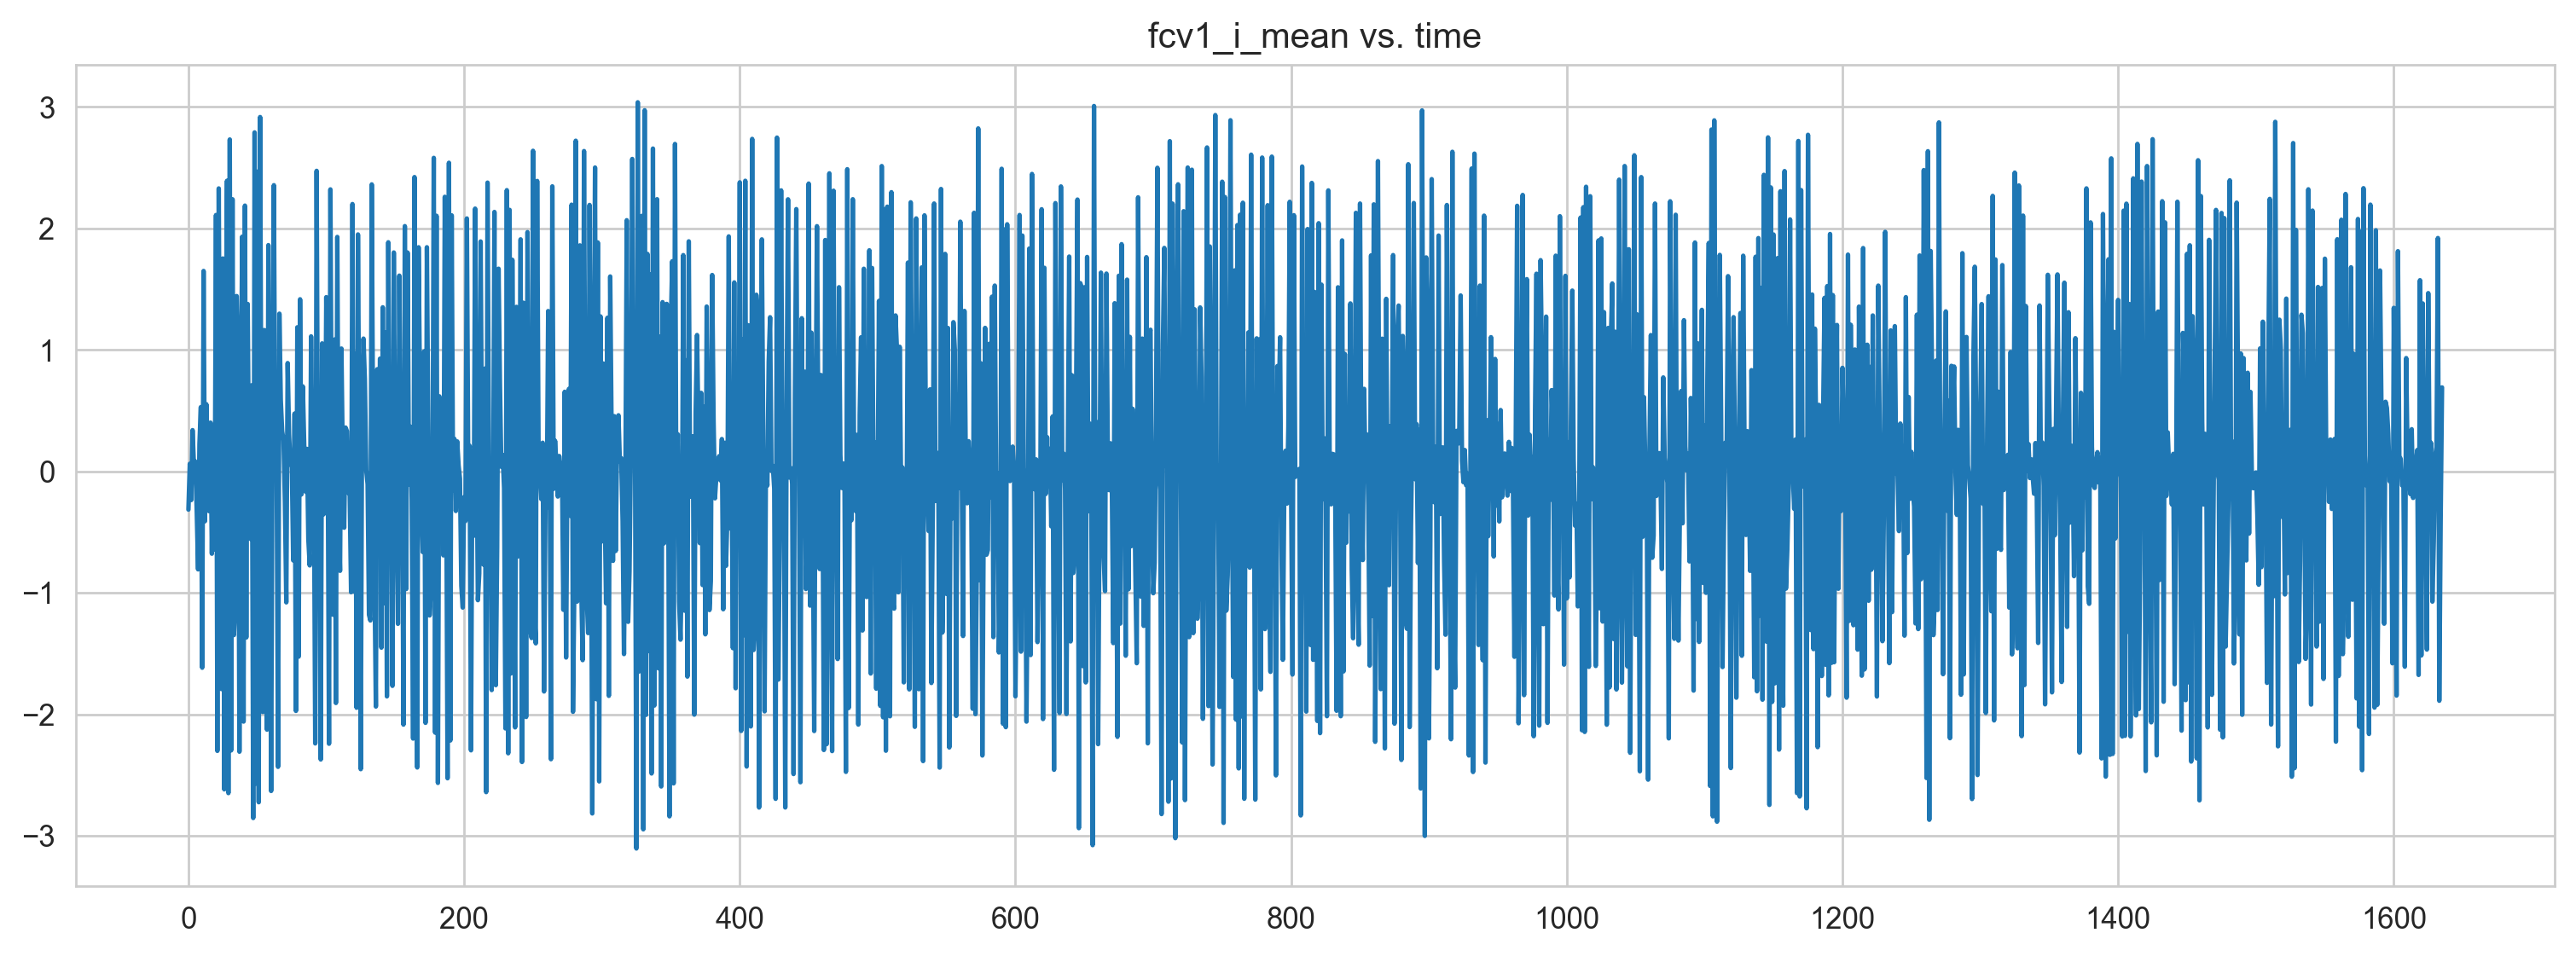

In [124]:
diff_tiny = tiny_data.diff().dropna()
feature_over_time(diff_tiny, "fcv1_i_mean")

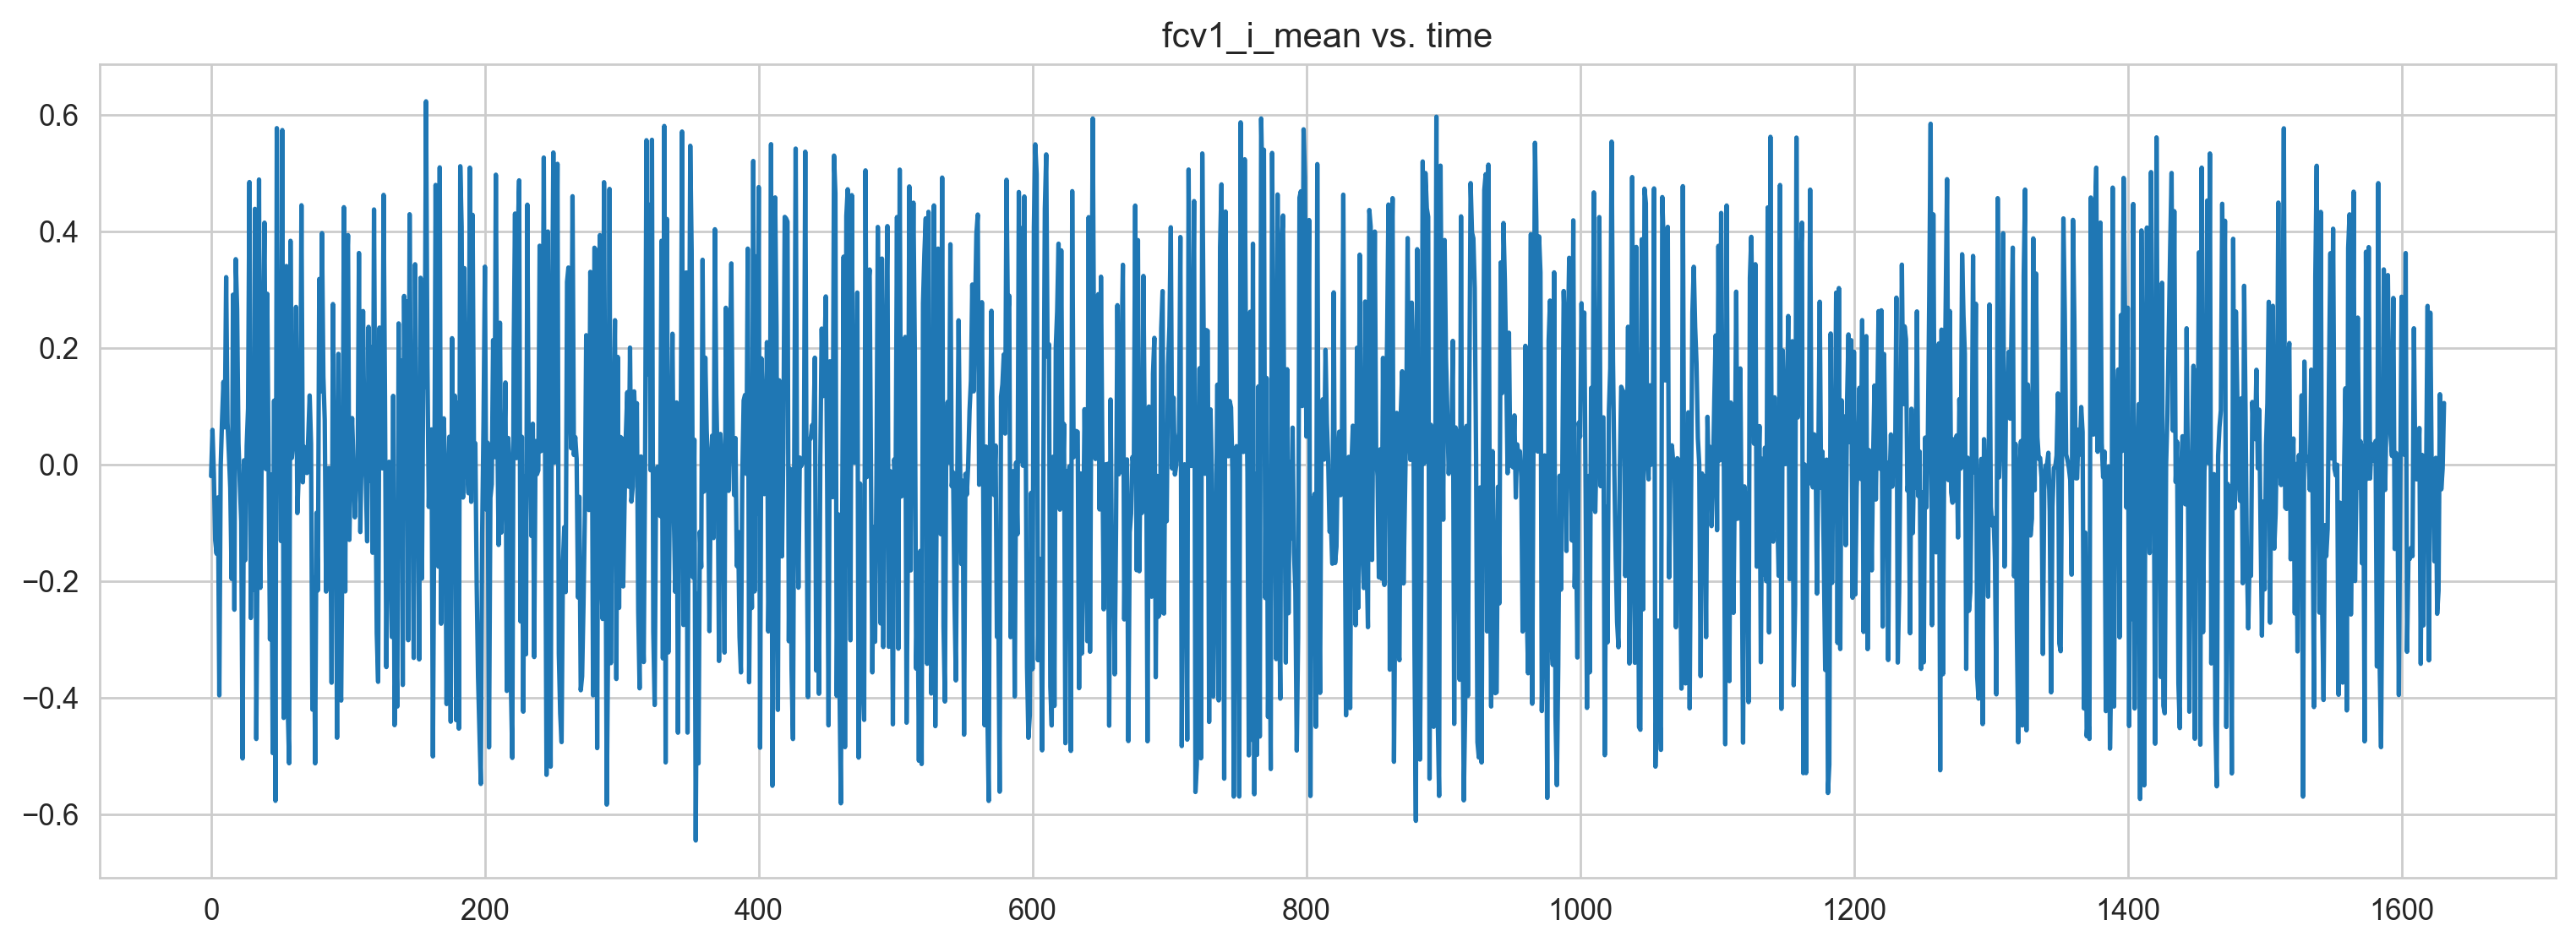

In [125]:
# Try smoothing the differential
smooth_diff_tiny = diff_tiny.rolling(window=5).mean().dropna()
feature_over_time(smooth_diff_tiny, "fcv1_i_mean")